<h1 align=center><font size = 5>Vision Transformer</h1 >


<h3>Objective for this Notebook</h3>
<h5> 1. 觀看架構圖，試著撰寫出模型</h5>
<h5> 2. einops套件的使用</h5>
<hr>

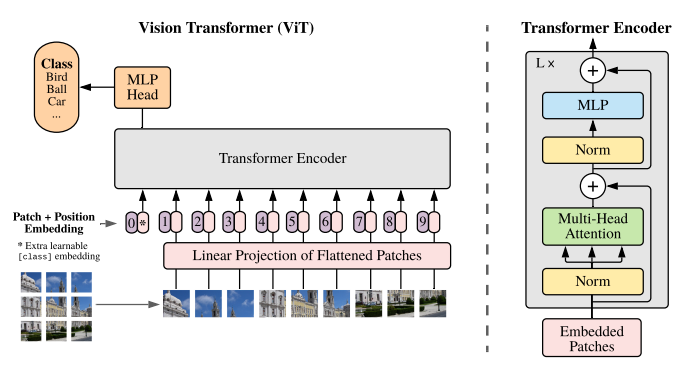

在實作ViT前，先閱讀一下einops套件的介紹(讀書報告: 📃 序章)！

In [3]:
import torch
import torch.nn as nn
from einops import rearrange

In [4]:
#移除一些複雜的處理（例如 LayerNorm 的重複使用、dropout、pooling 等）

class PatchEmbedding(nn.Module):
    def __init__(self, image_size, patch_size, dim, channels):
        super().__init__()





        #self.to_patch = Rearrange(                 )

        #linear

        #cls_token

        #pos_embedding

    def forward(self, x):



        #cls_token = repeat(                  )
        #torch.cat
        #pos_embedding

        return x


class Attention(nn.Module):
    def __init__(self, dim, heads=8, dim_head=64):
        super().__init__()
        inner_dim = heads * dim_head
        self.heads = heads
        self.scale = dim_head ** -0.5
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias=False)
        self.proj = nn.Linear(inner_dim, dim)

    def forward(self, x):
        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        out = attn @ v
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.proj(out)


class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, dim),
        )

    def forward(self, x):
        return self.net(x)


class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Attention(dim, heads, dim_head),
                FeedForward(dim, mlp_dim)
            ]))

    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x


class ViT(nn.Module):
    def __init__(self, image_size=(32, 32), patch_size=(8, 8), num_classes=10, dim=128, depth=6, heads=8, mlp_dim=256, channels=3, dim_head=64):
        super().__init__()





    def forward(self, x):




        #cls
        return self.mlp_head()

# 雙擊展開正確答案

<!--
#移除一些複雜的處理（例如 LayerNorm 的重複使用、dropout、pooling 等）

class PatchEmbedding(nn.Module):
    def __init__(self, image_size, patch_size, dim, channels):
        super().__init__()
        image_height, image_width = image_size
        patch_height, patch_width = patch_size
        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width

        self.to_patch = Rearrange('b c (h ph) (w pw) -> b (h w) (ph pw c)', ph=patch_height, pw=patch_width)
        self.linear = nn.Linear(patch_dim, dim)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))

    def forward(self, x):
        x = self.to_patch(x)              # 切成 patch
        x = self.linear(x)                # 映射到 dim 維度
        b, n, _ = x.shape
        cls_token = repeat(self.cls_token, '1 1 d -> b 1 d', b=b)
        x = torch.cat([cls_token, x], dim=1)
        x += self.pos_embedding[:, :n + 1]
        return x


class Attention(nn.Module):
    def __init__(self, dim, heads=8, dim_head=64):
        super().__init__()
        inner_dim = heads * dim_head
        self.heads = heads
        self.scale = dim_head ** -0.5
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias=False)
        self.proj = nn.Linear(inner_dim, dim)

    def forward(self, x):
        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        out = attn @ v
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.proj(out)


class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, dim),
        )

    def forward(self, x):
        return self.net(x)


class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Attention(dim, heads, dim_head),
                FeedForward(dim, mlp_dim)
            ]))

    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x


class ViT(nn.Module):
    def __init__(self, image_size=(32, 32), patch_size=(8, 8), num_classes=10, dim=128, depth=6, heads=8, mlp_dim=256, channels=3, dim_head=64):
        super().__init__()
        self.patch_embed = PatchEmbedding(image_size, patch_size, dim, channels)
        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim)
        self.mlp_head = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.transformer(x)
        cls_token_output = x[:, 0]
        return self.mlp_head(cls_token_output)

-->